In [1]:
import matplotlib
%pylab inline
from scipy import stats
import pandas as pd
import os
import pickle
import sys
import math
import ast
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
rs=42

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#interactive script to plot variation in K-fold CV based prediction error estiamtes for Document classification on reuters corpus

(0, 0.013)

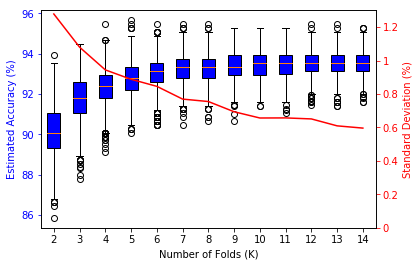

In [2]:
#load precomputed results
#consisting of 1,000 independent prediction error estiamtes for each choice of K
with open("REUTERS_K_VAR") as f:
    results=f.readlines()
for i in range(0,len(results)):
    results[i]=ast.literal_eval(results[i])
data=results


#calc SD for each k
sd=[]
for i in range(0,len(data)):
    sd.append(np.sqrt(np.var(data[i],ddof=1)))

#plot
fig, ax1 = plt.subplots()
bp = ax1.boxplot(data, patch_artist=True)
for patch in bp['boxes']:
        patch.set(facecolor='b')   
ax1.set_xlabel('Number of Folds (K)')
ax1.set_xticklabels([x for x in range(2,15)])
ax1.set_yticklabels([84+2*x for x in range(0,7)])
ax1.tick_params('y', colors='b')
ax1.set_ylabel('Estimated Accuracy (%)', color='b')
ax2 = ax1.twinx()
ax2.plot([x for x in range(1,14)],sd, 'r')
ax2.set_ylabel('Standard Deviation (%)', color='r')
ax2.set_yticklabels([0,0.2,0.4,0.6,0.8,1,1.2])
ax2.tick_params( colors='r')
plt.ylim([0,0.013])